In [1]:
# Packages for analysis
import pandas as pd
import numpy as np
from sklearn import svm

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
import pickle

# Read in muffin and cupcake ingredient data
recipes = pd.read_csv('data/recipes_muffins_cupcakes.csv')
#recipes

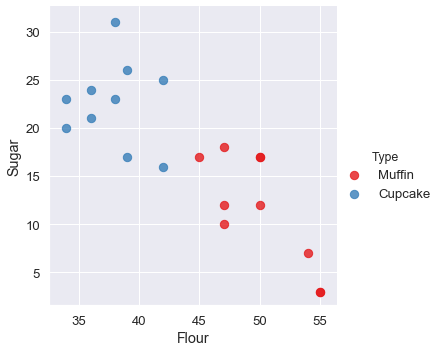

In [2]:
# Plot two ingredients
sns.lmplot('Flour', 'Sugar', recipes, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [3]:
# Specify inputs for the model
# ingredients = recipes[['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']].as_matrix()
X = recipes[['Flour','Sugar']].values
y = np.where(recipes['Type']=='Muffin', 0, 1)

In [4]:
# Fit the SVM model
model = svm.SVC(kernel='linear')
model.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [9]:
# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1] # Slope of the line
xx = np.linspace(30, 60) # Return evenly spaced numbers over a specified interval.
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[1]
yy_up = a * xx + (b[1] - a * b[0])

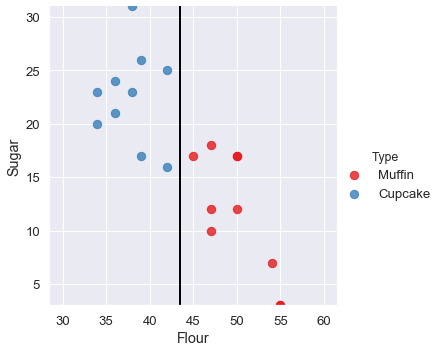

In [10]:
# Plot the hyperplane
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.ylim(recipes.Sugar.min(), recipes.Sugar.max())
plt.plot(xx, yy, linewidth=2, color='black');

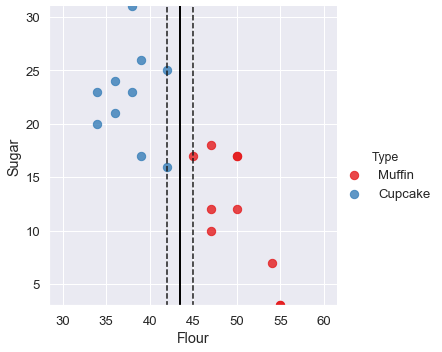

In [11]:
# Look at the margins and support vectors
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.ylim(recipes.Sugar.min(), recipes.Sugar.max())
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

In [125]:
model.support_vectors_

array([[45., 17.],
       [42., 16.],
       [42., 25.]])

In [126]:
model.n_support_

array([1, 2])

In [5]:
model.support_vectors_

array([[45., 17.],
       [42., 16.],
       [42., 25.]])

In [94]:
b

array([ 4.76, 69.  ])